# Best Add Predictor Using UCB
####implemented by Koushik

###Importing Libraries

In [107]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import os
import seaborn as sns
sns.set_style("whitegrid")

###Importing Data Set

In [108]:
dataset = pd.read_csv("Ads_CTR_Optimisation.csv")
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


###Implementing UCB

In [110]:
import math

N =10000
d = 10
ads_selected = []
numbers_of_selections = [0]*d
sum_of_rewards = [0]*d
total_reward = 0

for n in range(0, N):
  ad = 0
  max_upper_bound = 0
  for i in range(0, d):
      if (numbers_of_selections[i] > 0):
         average_reward = sum_of_rewards[i] / numbers_of_selections[i]
         delta_i = math.sqrt(3/2 * math.log(n+1) / numbers_of_selections[i])
         upper_bound = average_reward + delta_i

      else:
          upper_bound = 1e400
      if upper_bound > max_upper_bound:
          max_upper_bound = upper_bound
          ad = i  

  ads_selected.append(ad)
  numbers_of_selections[ad] += 1
  reward = dataset.values[n, ad]
  sum_of_rewards[ad] += reward
  total_reward += reward   

###Visualising the rusults

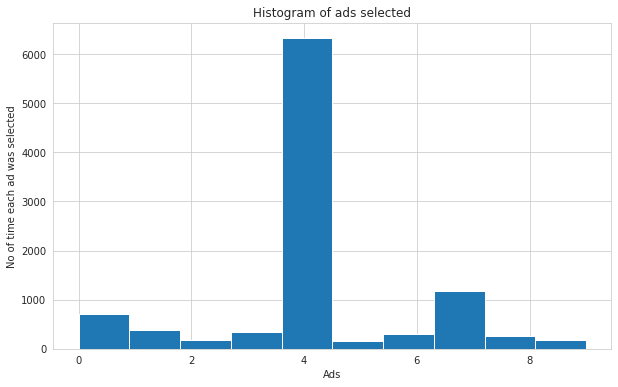

In [111]:
plt.figure(figsize = (10,6))
plt.hist(ads_selected, edgecolor = 'white')
plt.title("Histogram of ads selected")
plt.xlabel("Ads")
plt.ylabel("No of time each ad was selected")
plt.show()

# Best Add Predictor Using Thompson Sampling
####implemented by Koushik

###Importing Libraries

In [112]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import os
import seaborn as sns
sns.set_style("whitegrid")

###Importing Dataset

In [113]:
dataset = pd.read_csv("Ads_CTR_Optimisation.csv")
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [116]:
dataset.shape

(10000, 10)

### Implementing Thompson Sampling

In [117]:
import random

N =10000
d = 10
ads_selected = []
number_of_rewards_1 = [0] * d
number_of_rewards_0 = [0] * d
total_reward = 0

for n in range(0, N):
  ad = 0
  max_random = 0
  for i in range(0,d):
      random_beta = random.betavariate(number_of_rewards_1[i] + 1 , number_of_rewards_0[i] +1)

      if random_beta > max_random:
          max_random = random_beta
          ad = i
             
  ads_selected.append(ad)
  reward = dataset.values[n , ad]
  if reward == 1:
    number_of_rewards_1[ad] =  number_of_rewards_1[ad] + 1
  else:
    number_of_rewards_0[ad] =  number_of_rewards_0[ad] + 1
  total_reward += reward

###Visualising the rusults

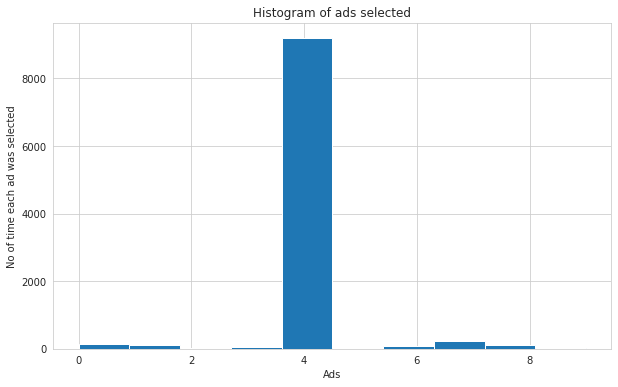

In [118]:
plt.figure(figsize = (10,6))
plt.hist(ads_selected, edgecolor = 'white')
plt.title("Histogram of ads selected")
plt.xlabel("Ads")
plt.ylabel("No of time each ad was selected")
plt.show()